#### Problem statement

Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find
the real price of items in the market based on the demand. The price offered by anyone participating in this
process is termed as a 'bid'. A dataset is available at the following link and on Moodle for the bidding of
customers:
https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset
Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. Your goal is to use classification
or clustering algorithms to predict the bids in the future. You would need to clean and prepare the dataset
for the machine learning modelling under the following guidelines for Data Preparation and Machine
Learning modules.


### TABLE OF CONTENTS:

1. Data Dictionary
2. Part 1: Exploratory Data Analysis - EDA
3. Part 2: Data Preparation
        A: Renaming
        B: Encoding
        C: Dropping Columns
        D: Applying scaler on the dataset
4. Part 3: Visualizations of Key Variables
        A: Class distribution
        B: Auction type popularity:
        C: Starting Average price:
        D: Relation between features using Pearson Correlation method
5. Part 4: PCA
        A: PCA for dimensionality reduction
        B: PCA for visualization of the separation of the class
6. Part 5: LDA
7. Part 6: Machine Learning
        A: splitting the data into train and test
        B: Over-sampling: SMOTE
        C: Implementing Support Vector Machine Model
        D: Implementing Random Forest model
        E: Implementing Naive Bayes model
        F: Model Comparison
8. Part 7: Findings and conclusion:
9. References

### Data Dictionary

<table>
    <thead>
        <tr>
            <th>Dataframe</th>        
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>df</td>
            <td>Original dataframe created</td>
          <tr>
            <td>df1 </td>
            <td>Dataframe created after applying Encoding</td>           
           <tr>
            <td>df2</td>
            <td>Dataframe created after removal of columns</td>
               <tr>
            <td>X</td>
            <td>Dataframe created after seperating target column</td>
                   <tr>
            <td>y</td>
            <td>Dataframe created for our Target column</td>
                       <tr>
                           <td>X_scaled</td>
            <td>Dataframe created after scaling of X</td>
                   <tr>
                       <td>X_scaled_df</td>
            <td>Dataframe created to review scaled values in the dataframe</td>
                   <tr>
            <td>pca_1</td>
            <td>dataframe after applying PCA for dimention reduction purposes</td>
                           <tr>
            <td>pca_2</td>
            <td>Dataframe created after application of PCA for two dimentional visualisation of our Class</td>
                               <tr>
            <td>X_lda</td>
            <td>Dataframe created after application of LDA process on the data</td>

### Part 1: Exploratory Data Analysis - EDA

Exploratory Data Analysis is used to analyse datasets and outline the main characteristics of the data. It helps in understanding the patterns within the data, identify evident errors and find correlation between features. Conducting EDA is one of the first steps we do with any dataset we work with in order to explore the data as it enables us to acknowledge what kind of data we are dealing with by checking the shape and size of the data, identifying missing values, unique values and others.

In order to conduct EDA first step needed is to import the required libraries:

Pandas is used to clean the data, manipulate into tables and process it. It handles data load by reading from various sources; Seaborn library is used for data visualisation; Matplot is also used for data visualisation; %matplotlib inline is used to format the visualisations; Numpy is used for mathematical operations.

By importing the libraries with a short name allows us to save typing the full name of the library every time we need to call it in a function.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Suppress the warning messages

In [3]:
import warnings
warnings.filterwarnings('ignore') 

By running the code below the data from the dataset is uploaded into the dataframe using Pandas Library. A dataframe object is created transferring semi structured data (in this case a csv file) into a structured type of data.

pd.read_csv works for any data file that is a csv type using Pandas library by giving an address where the data is.

In [4]:
df = pd.read_csv('Shill Bidding Dataset.csv')

To check how many columns and observations are in this dataset we can use .shape function. The first number shows the number of rows or observations and the second one shows the total number of columns within the dataset. This dataset as we can see has 6321 observations and 13 columns.

In [5]:
df.shape

(6321, 13)

Now to read the data we need to call the dataframe created "df" and the function .head to see what is available within this dataset. Changing the argument in between brackets allows us to add the number of rows we want to see. If we do not add a number between brackets by default the function will show the top 5 rows within the dataset (all indexes start with zero).

In [6]:
df.head(2)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.20000,0.4,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.02439,0.2,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0


In order to display the bottom 5 rows of the dataset the function .tail is used. Like function .head by default .tail shows 5 entries in the dataset. It also can be changed by modifying the argument number between brackets.

In [7]:
df.tail(2)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.0,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.0,7,0


The .info is another function to check the data. The first column is the index for each feature we have, the second column shows the variable name and the third column gives the data type, if it is an object means the data is text, float64 is a decimal number and int64 when it is whole number.

It is useful information in order to start preparing the data. According to the below, this dataset has 1 feature that is text (object) therefore qualitative data; 4 features that contain whole numbers (int64) and 8 features with decimal numbers (float64) which means both quantitative data. Also shows there are no null(missing) values and gives how much memory is being used in the computer.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


As there are no missing values in our dataset, the next step is to check if there are any duplicated records:

After running the .duplicate() function below we can see that the first number shows the number of duplicates, which is 0 rows and the second column shows the total number of columns, which are 13.<br>
This means there are not duplicates. <br>
There is not action needed here.

In [9]:
df_dup = df[df.duplicated()]
print("Number of duplicate rows: ", df_dup.shape)

Number of duplicate rows:  (0, 13)


To check basic statistics we can use .describe() method which will show:
- number of records
- average value of the column
- Standard deviation of our feature
- minimum value
- the 25%, 50% and 75% 
- the maximum value in the column.

In [10]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


### Part 2: Data Preparation

#### A: Renaming

To simplify the column names and also for better understanding of our features I will rename some of them:

In [11]:
df = df.rename(columns={'Bidder_Tendency':'Bid_Tendency','Bidding_Ratio':'Bid_Ratio', 'Successive_Outbidding':'Outbidding',
                                        'Starting_Price_Average':'Start_Avg_Price', 'Auction_Duration' : 'Auction_Type'})

Reviewing the feature Bidder_ID feature - this is the only non-numerical feature in our dataset. <br>
To remove any constrains in applying algorithms to our dataset the good practice is to convert that column into numerical type.


The method .describe() applied on categorical data will show us the number of records, number of unique values, and the value that appears most of the time.

In [12]:
df['Bidder_ID'].describe()

count      6321
unique     1054
top       a***a
freq        112
Name: Bidder_ID, dtype: object

#### B: Encoding

There are several way to Encode Categorical Data in Python:
- Label Encoding or Ordinal Encoding
- One hot Encoding
- Dummy Encoding
- Effect Encoding
- Binary Encoding
- BaseN Encoding
- Hash Encoding
- Target Encoding<br>

Our feature has over 1 thousand unique values, the best way to encode categorical data with so many unique values is to use BaseN Encoding.<br>

Base-N encoder encodes the categories into arrays of their base-N representation. A base of 1 is equivalent to one-hot encoding (not really base-1, but useful), a base of 2 is equivalent to binary encoding. N=number of actual categories is equivalent to vanilla ordinal encoding.<br>
(McGinnis, W. 2016)


Importing needed library to be able to apply BaseN Encoder on our dataset.

In [13]:
import category_encoders as ce

In [14]:
encoder = ce.BaseNEncoder(cols=['Bidder_ID'], return_df=True, base=8)

In [15]:
df1 = encoder.fit_transform(df)

Reviewing new dataframe with new created features:

In [16]:
df1.head()

,Record_ID,Auction_ID,Bidder_ID_0,Bidder_ID_1,Bidder_ID_2,Bidder_ID_3,Bid_Tendency,Bid_Ratio,Outbidding,Last_Bidding,Auction_Bids,Start_Avg_Price,Early_Bidding,Winning_Ratio,Auction_Type,Class
0,1,732,0,0,0,1,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,0,0,0,2,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,0,0,0,3,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,0,0,0,4,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,0,0,0,5,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


After applying the method we can see that we have got 4 totally new columns related to Bidder_ID.

Reviewing few new columns using method .value_counts(), that way I can see what kind of entries have been created and number of appearances.

In [17]:
df1['Bidder_ID_0'].value_counts()

0    4745
1    1545
2      31
Name: Bidder_ID_0, dtype: int64

In [18]:
df1['Bidder_ID_1'].value_counts()

0    1291
1    1127
3     841
2     772
4     736
5     592
6     524
7     438
Name: Bidder_ID_1, dtype: int64

Reviewing our dataset again using .info().

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Record_ID        6321 non-null   int64  
 1   Auction_ID       6321 non-null   int64  
 2   Bidder_ID_0      6321 non-null   int64  
 3   Bidder_ID_1      6321 non-null   int64  
 4   Bidder_ID_2      6321 non-null   int64  
 5   Bidder_ID_3      6321 non-null   int64  
 6   Bid_Tendency     6321 non-null   float64
 7   Bid_Ratio        6321 non-null   float64
 8   Outbidding       6321 non-null   float64
 9   Last_Bidding     6321 non-null   float64
 10  Auction_Bids     6321 non-null   float64
 11  Start_Avg_Price  6321 non-null   float64
 12  Early_Bidding    6321 non-null   float64
 13  Winning_Ratio    6321 non-null   float64
 14  Auction_Type     6321 non-null   int64  
 15  Class            6321 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 790.2 KB


After another look and review of the Bidder_ID columns I've got to conclusion that at the end I cannot be sure that each of the unique bidders is actually unique due to the fact that part of the digits have been hidden under *  and it could be that a few different bidder IDs are actually under one unique record. For example: * a***a *  that appears over 100 times may belong to many bidders that their ID starts from a and end on a.<br>

Instead I have decided to drop that feature from our dataset.

Also dropping the Record_ID and Auction_ID as there is no value in the information that these feature keep.

#### C:  Dropping Columns

In [20]:
df2 = df.drop(columns= ["Bidder_ID", "Record_ID", "Auction_ID"],axis=1)   

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bid_Tendency     6321 non-null   float64
 1   Bid_Ratio        6321 non-null   float64
 2   Outbidding       6321 non-null   float64
 3   Last_Bidding     6321 non-null   float64
 4   Auction_Bids     6321 non-null   float64
 5   Start_Avg_Price  6321 non-null   float64
 6   Early_Bidding    6321 non-null   float64
 7   Winning_Ratio    6321 non-null   float64
 8   Auction_Type     6321 non-null   int64  
 9   Class            6321 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 494.0 KB


#### D: Applying scaler on the dataset

One of the most crucial steps for a successful application of a ML algorithm in the pre-processing of data phase is the feature scaling of the variables. 

Our data looks like it has been scaled already but there is one feature that its a little out of the scale: Auction_Duration. I will apply scaler again. <br>
This time I will use Standard Scaler.<br>
The standard score of a sample x is calculated as:

z = (x - u) / s<br>

To apply the scaler I need to split the dataset into: target and independent features, applying scaler on the independent features only.<br>

Importing Standard Scaler from sklearn.preprocessing library.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
s_scaler = StandardScaler()

In [24]:
X = df2.drop(['Class'], axis=1)
y = df2[['Class']]

In [25]:
X.head()

,Bid_Tendency,Bid_Ratio,Outbidding,Last_Bidding,Auction_Bids,Start_Avg_Price,Early_Bidding,Winning_Ratio,Auction_Type
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7


In [26]:
X_scaled = s_scaler.fit_transform(X)

In [27]:
X_scaled.shape

(6321, 9)

I would like to double check if the data has been scaled, and review that in the Dataframe form.<br>
To be able to do this I will transform X_scaled ndarray into DataFrame using pandas.DataFrame method:

In [28]:
X_scaled_df = pd.DataFrame(X_scaled)

In [29]:
X_scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,0.291571,2.070638,-0.371076,-1.218447,-0.907433,1.063074,-1.131055,0.684785,0.156058
1,-0.599542,0.549957,-0.371076,-1.183993,-0.907433,1.063074,-1.096663,1.321104,0.156058
2,0.001606,0.549957,-0.371076,-1.210517,-0.907433,1.063074,-1.123139,1.448368,0.156058
3,-0.215868,0.549957,-0.371076,-0.962047,-0.907433,1.063074,-0.875118,1.448368,0.156058
4,-0.463082,0.718921,-0.371076,-1.215053,-0.907433,-0.965191,-1.127866,0.302994,0.966946


In [30]:
y.shape

(6321, 1)

### Part 3: Visualizations of Key Variables

#### A: Class distribution 

I want to see how the Class distribution of our Target feature looks in numbers:

In [31]:
df2['Class'].value_counts()

0    5646
1     675
Name: Class, dtype: int64

From the above code I can understand that the majority Class is zero, which we know represents Normal Bids, and only 675 of anormal bids.

Lets see how this is represented on bar chart.<br>


Using Seaborn library and the barplot to do that, on x axis plotting the index of the class count that at the same time, on the y axis plotting the value counts of the value of the class.

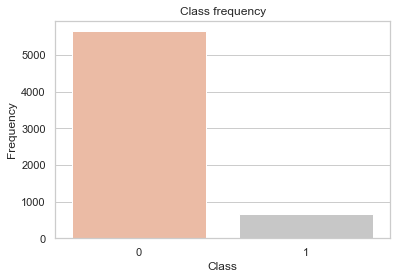

In [32]:
sns.set(style='whitegrid')
ax=sns.barplot(x=df2['Class'].value_counts().index,y=df1['Class'].value_counts().values,palette="RdGy")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class frequency')
plt.show()

Our data is highly unbalanced and I will deal with this problem later on.

#### B: Auction type popularity:

There are several diffrent auction types represented in the dataset, the types of the auctions vary based on the duration of the Auction. (1 hr auction, 5 hrs auction and so on).

We can see that we have 5 different auctions.

In [33]:
auction_type = df2['Auction_Type'].value_counts()
print(auction_type)

7     2427
3     1408
1     1289
5     1060
10     137
Name: Auction_Type, dtype: int64


I will visualize distribution of this auctions and number of them using Seaborn and countplot.

Text(0.5, 1.0, 'Auction Types')

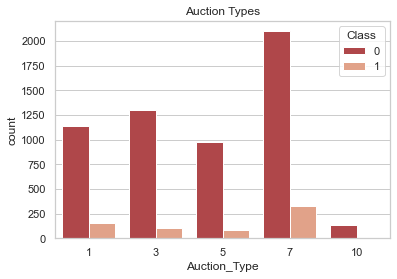

In [34]:
sns.set_palette('RdGy')
ax = sns.countplot(data=df2, x='Auction_Type', hue='Class')
plt.title('Auction Types')

From the plot we can read that the most popular Auction is the 7 hours one and that most of the anormal bids happen at that auction.

#### C:  Starting Average price:

In [35]:
price=df2['Start_Avg_Price'].value_counts()
print(price)

0.000000    3253
0.993593    1921
0.999935     345
0.993528     322
0.935346      89
0.676405      48
0.999353      43
0.998900      36
0.987121      34
0.825259      29
0.967640      29
0.935281      26
0.676469      24
0.961233      23
0.514607      22
0.935605      15
0.546967      15
0.553050      15
0.995146      13
0.967705      11
0.805843       5
0.929586       3
Name: Start_Avg_Price, dtype: int64


[Text(0.5, 1.0, 'Starting Price')]

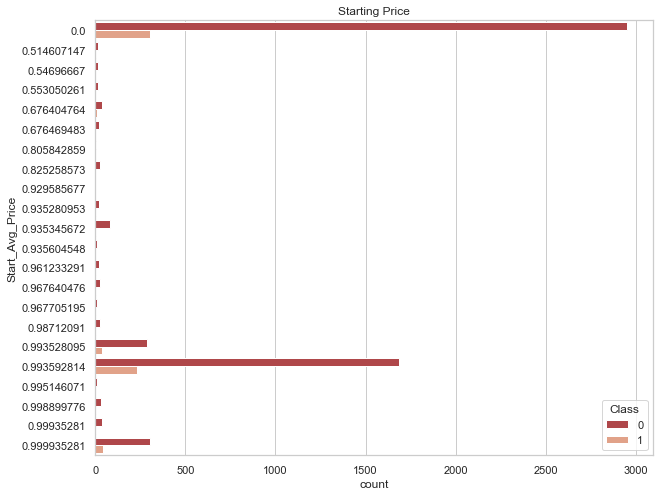

In [36]:
sns.set_palette('RdGy')
ax, fig = plt.subplots(figsize=[10,8])
sns.countplot(data=df2, y='Start_Avg_Price', hue='Class').set(title='Starting Price')


#### D: Relation between features using Pearson Correlation method 

First checking the absolute correlation towards our Class and sorting result in descending order:

In [37]:
imp_feat_corr = abs(df2.corr()['Class']).sort_values(ascending=False)
print(imp_feat_corr)

Class              1.000000
Outbidding         0.901035
Bid_Ratio          0.569435
Winning_Ratio      0.394122
Bid_Tendency       0.295533
Last_Bidding       0.097655
Early_Bidding      0.053570
Auction_Bids       0.044964
Start_Avg_Price    0.042604
Auction_Type       0.021145
Name: Class, dtype: float64


The strongest correlation with Class have values with the highest weight, such as: Outbidding and Bid_Ratio.

Plotting results on the bar chart.

Text(0.5, 1.0, 'Features correlation towards Class')

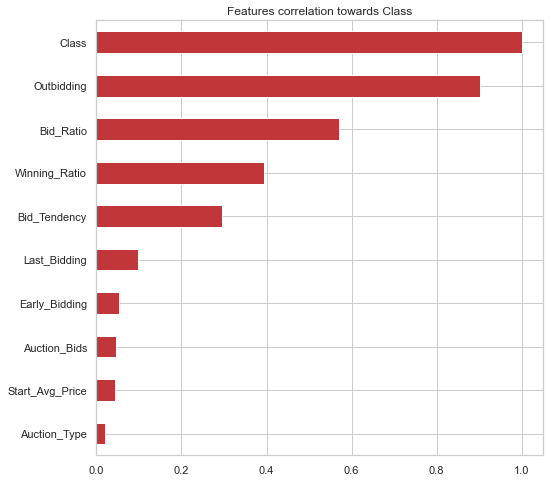

In [38]:
plt.figure(figsize=(8,8))
sns.set_palette('RdGy')
ax = df2.corr()['Class'][:].sort_values().plot(kind ='barh')
ax.set_title('Features correlation towards Class')

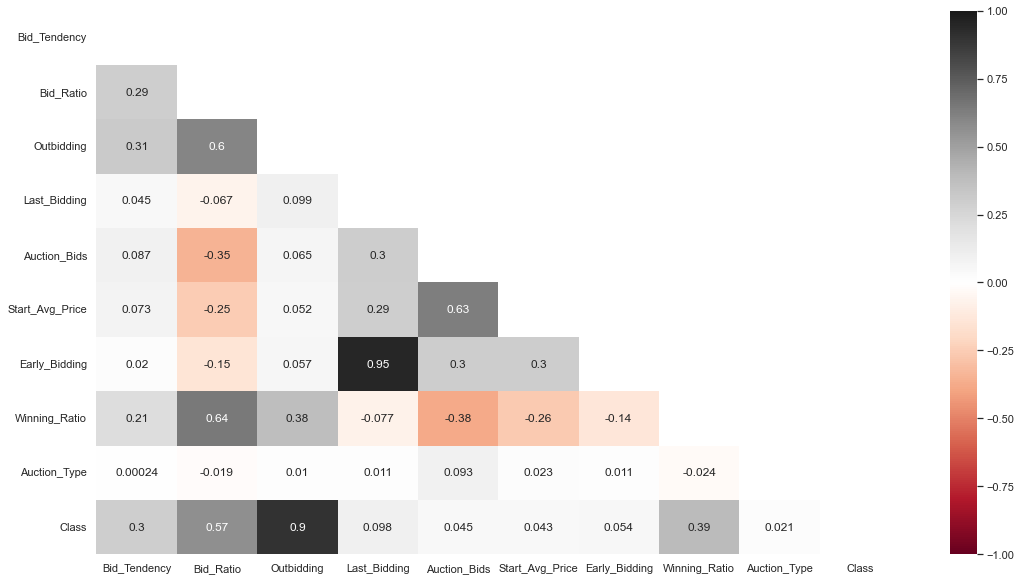

In [39]:
plt.figure(figsize = (18,10)) 
mask = np.triu(np.ones_like(df2.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(),vmin=-1, vmax=1, mask = mask, annot = True, cmap='RdGy')


From the above charts we can see that the weakest correlation with 'Class' have columns with values close to zero, like: Auction_Type, Start_Avg_Price, Auction_Bids and Early_Bidding. <br>
The feature 'Outbidding' has the highest positive correlation, followed by 'Bid_Ratio'. 

### Part 4: PCA

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.<br>
(VanderPlas, J. 2016)

#### A: PCA for dimensionality reduction

At first I would like to check if we can apply PCA for dimentionality reduction purposes of our DataSet.<br>
I am going to visualise the explained variance to see how many components we need to keep to not lose the "essance" from the information in our data.

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

importing PCA from sklearn.decomposition library

In [40]:
from sklearn.decomposition import PCA

Plotting the variance ratio to see if it make sense to use dimensionality reduction for our dataset.

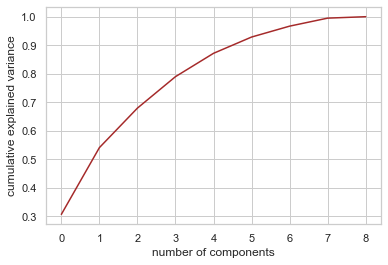

In [41]:
pca_1 = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_), color='brown') 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

Now to see how many components I would need to keep if I would like to retain 99% of information from our data.

In [42]:
pca_1 = PCA(0.99).fit(X_scaled)
pca_1.n_components_ 

8

In [43]:
pca_1 = pca_1.fit_transform(X_scaled)
print(X_scaled.shape)
print(pca_1.shape)

(6321, 9)
(6321, 8)


It seems that application of PCA when we want to retain 99% of the information from our data is going to reduce the dimensionality of the data from 9 to 8 features. <br>
This would suggest that use of PCA is not bringing much value.


#### B: PCA for visualization of the separation of the class

The full data is a 9-dimensional. <br> By applying the code below I will find the optimal stretch and rotation in 9-dimensional space that allows us to see the layout of the datapoints in two dimensions.

In [44]:
pca_2 = PCA(2)  
pca_2 = pca_2.fit_transform(X_scaled)
print(X_scaled.shape)
print(pca_2.shape)

(6321, 9)
(6321, 2)


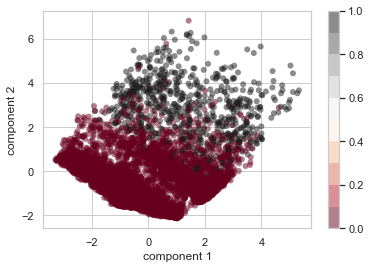

In [45]:
plt.scatter(pca_2[:, 0], pca_2[:, 1],
            c=df1['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('RdGy', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

From the scatter plot above we can see that our classes are not strongly separated, we can see interjection between them.

### Part 5: LDA

Linear Discriminant Analysis is all about finding a lower-dimensional space, where to project the data unto in order to provide more meaningful data for the algorithm. LDA could also be used for classification problem.<br>
Fisher’s Linear Discriminant is about maximizing the class separation, hence making it a supervised learning problem. Unlike PCA, which is an unsupervised dimensionality reduction method for preserving maximum variance. <br>
(Gudiksen, M. 2021)

LDA is limited to a dimension of size n - 1, meaning that you can only project to a dimensional space lower than the number of classes in your dataset.

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()


First projecting into 1D spece due to the fact that we have rule: number of classes -1, in our case we have two classes - 1 = 1D space.

In [47]:
dim = 1

projecting model into 1D space:

In [48]:
lda_model = LDA(n_components= dim)

fitting our data into the model

In [49]:
lda_model.fit(X, y)

LinearDiscriminantAnalysis(n_components=1)

In [50]:
lda_preds = lda_model.predict(X)
lda_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

(array([5478.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         843.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

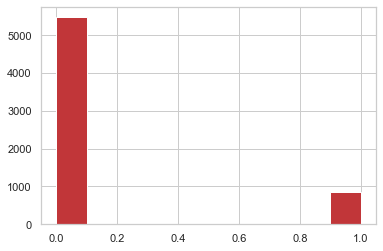

In [51]:
plt.hist(lda_preds)

In [52]:
EVR = lda_model.explained_variance_ratio_
for idx, R in enumerate(EVR):
    print("Component {}: {}% var".format(idx+1, np.round(R*100,2)))

Component 1: 100.0% var


In [53]:
lda_preds.shape

(6321,)

In [54]:
lda_model.explained_variance_ratio_

array([1.])

<b> LinearDiscriminantAnalysis can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes </b>  The dimension of the output is necessarily less than the number of classes, so this is, in general, a rather strong dimensionality reduction, <b> and only makes sense in a multiclass setting.</b> <br>
(https://scikit-learn.org/)

### Part 6:  Machine Learning

Our problem can be solved using supervised classification algorithms.

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.
Supervised learning problems can be further grouped into regression and classification problems.

Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight”.<br>
(Brownlee, J. (2020))


#### A: splitting the data into train and test

In [55]:
from sklearn.model_selection import train_test_split

I am now splitting our data into test and train. I will set the set 80% for training and 20% for testing. To select the size of the split I am using parameter: test_size and assigning size of the testing data, and also using parameter random_seed to have same outcome each time I runn the split.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 82)

In [57]:
print('Total number of rows and columns for the complete dataset: ', X_scaled.shape, y.shape)

Total number of rows and columns for the complete dataset:  (6321, 9) (6321, 1)


In [58]:
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Number of rows and columns after splitting dataset:  (5056, 9) (1265, 9) (5056, 1) (1265, 1)


Checking again, confirming Class distribution in our X_train data. <br>
And can clearly see that the data is highly imbalanced.

One of the major issues dealing with highly imbalanced data relates to the metrics used to evaluate the model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

In [59]:
y_train.value_counts()

Class
0        4524
1         532
dtype: int64

Widely used solution to this problem is to do: Resampling. <br>
It is a technique for dealing with highly unbalanced datasets. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

There is many methods to do the resampling. <br>
I will use:

#### B: Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.<br>
(Alencar, R. (2018))

importing SMOTE from imblearn library

creating SMOTE classifier and fitting our Train data into it:

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)


checking our class distribution now to see if it is balanced:

In [61]:
y_sm.value_counts()

Class
0        4524
1        4524
dtype: int64

Instead of applying X_train to our Machine Learning models I will use X_sm.

#### From among several supervised classification algorithms I have chosen the following: <br>

- SVM
- Random Forest
- Naive Bayes

#### C: Implementing  Support Vector Machine Model

SVM (Support Vector Machine) classifies the data using hyperplane which acts like a decision boundary between different classes. Extreme data points from each class are called Support Vectors. SVM tries to find the best and optimal hyperplane which has maximum margin from each Support Vector. 


<b> Advantages of Support Vector Machine (SVM) </b>
1. Regularization capabilities: SVM has L2 Regularization feature. So, it has good generalization capabilities which prevent it from over-fitting.

2. Handles non-linear data efficiently: SVM can efficiently handle non-linear data using Kernel trick.

3. Solves both Classification and Regression problems: SVM can be used to solve both classification and regression problems. SVM is used for classification problems while SVR (Support Vector Regression) is used for regression problems.

4. Stability: A small change to the data does not greatly affect the hyperplane and hence the SVM. So the SVM model is stable.

<b> Disadvantages of SVM </b>
1. Choosing an appropriate Kernel function is difficult: Choosing an appropriate Kernel function (to handle the non-linear data) is not an easy task. It could be tricky and complex. In case of using a high dimension Kernel, you might generate too many support vectors which reduce the training speed drastically. 

2. Extensive memory requirement: Algorithmic complexity and memory requirements of SVM are very high. You need a lot of memory since you have to store all the support vectors in the memory and this number grows abruptly with the training dataset size.

3. Requires Feature Scaling: One must do feature scaling of variables before applying SVM.

4. Long training time: SVM takes a long training time on large datasets.

5. Difficult to interpret: SVM model is difficult to understand and interpret by human beings unlike Decision Trees.<br>
(Kumar, N. (2019))

importing needed libraries to build model, to hypertune and evaluate

In [62]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Applying Support Vector Machine model with hypertuning of parameters: GridSearch to make sure the best results received.

Selecting kernel: 'rbf' for the non linear datasets problems.

RBF Kernel is popular because of its similarity to K-Nearest Neighborhood Algorithm. It has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines just needs to store the support vectors during training and not the entire dataset.<br>
(Sreenivasa, S. (2020))

Using KFolds for cross validation, number of splits = 5.

In [63]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

model = SVC(kernel="rbf")

# set up GridSearchCV()
svc_tuned = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)                   

fitting the tuned model on our data

In [64]:
svc_tuned.fit(X_sm, y_sm)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

checking the results in form of DataFrame

In [65]:
cv_results = pd.DataFrame(svc_tuned.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.162326,0.005838,0.054336,0.003979,1,0.01,"{'C': 1, 'gamma': 0.01}",0.981768,0.980663,0.988398,...,0.983643,0.003488,7,0.984112,0.984388,0.982454,0.982732,0.984528,0.983643,0.000872
1,0.385315,0.009465,0.145874,0.005370,1,0.001,"{'C': 1, 'gamma': 0.001}",0.981768,0.980663,0.988398,...,0.983532,0.003378,8,0.983973,0.984250,0.982316,0.982732,0.984390,0.983532,0.000844


summary of the best results:

In [66]:
best_score = svc_tuned.best_score_
best_hyperparams = svc_tuned.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.9965737304881364 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


Building SVM model using best parameters:

In [67]:
best_params = {"C": 1000, "gamma": 0.01, "kernel":"rbf"}

# model
svc_model = SVC(C=10, gamma=0.01, kernel="rbf", probability=True)

svc_model.fit(X_sm, y_sm.values.ravel())
y_pred = svc_model.predict(X_test)

Print training and testing dataset scores

In [68]:
print('Training set score: {:.4f}'.format(svc_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc_model.score(X_test, y_test)))

Training set score: 0.9814
Test set score: 0.9810


<b> SVM model evaluation </b>

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

Print accuracy, precision and sensitivity/recall scores

In [70]:
svc_model_accuracy = metrics.accuracy_score(y_test, y_pred)
svc_model_precision = metrics.precision_score(y_test, y_pred)
svc_model_recall = metrics.recall_score(y_test, y_pred)
svc_model_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy of SVM with best parameters - "   , svc_model_accuracy)
print("Precision of SVM with best parameters - ", svc_model_precision)
print("Sensitivity/recall of SVM with best parameters - ", svc_model_recall)
print('F1 score of SVM with best parameters - ', svc_model_f1)

Accuracy of SVM with best parameters -  0.9810276679841897
Precision of SVM with best parameters -  0.8606060606060606
Sensitivity/recall of SVM with best parameters -  0.993006993006993
F1 score of SVM with best parameters -  0.922077922077922


Confusion Matrix:


In [71]:
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1122
           1       0.86      0.99      0.92       143

    accuracy                           0.98      1265
   macro avg       0.93      0.99      0.96      1265
weighted avg       0.98      0.98      0.98      1265

[[1099   23]
 [   1  142]]


<AxesSubplot:>

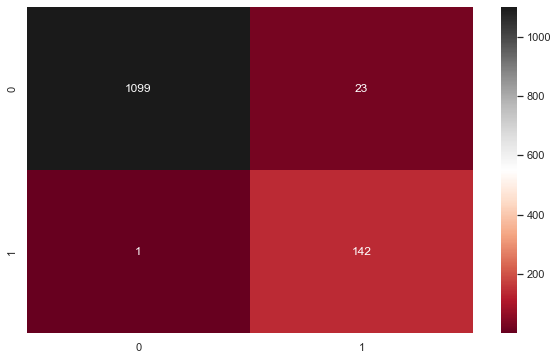

In [72]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdGy')

Explanation of confusion matrix:
We had 1265 observations for the testing (y_test). 1099 bids predicteded correctly as normal (0), 1 was classified as anomalous (1) but actually it was normal bid (type II error). 142 bids correctly predicted to be anomalous, 23 were classified as normal but they were actually anomalous (type I error).

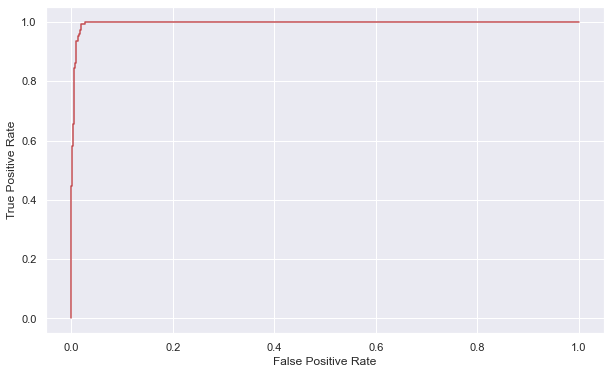

In [73]:
y_pred_proba = svc_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color='r')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### D: Implementing Random Forest model

Random forest, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.<br>
(Yiu, T. (2019))

<b> Advantages of Random Forest </b>

1. Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.

2. Random Forest can be used to solve both classification as well as regression problems.

3. Random Forest works well with both categorical and continuous variables.

4. Random Forest can automatically handle missing values.

5. No feature scaling required: No feature scaling (standardization and normalization) required in case of Random Forest as it uses rule based approach instead of distance calculation.

6. Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Random Forest unlike curve based algorithms. So, if there is high non-linearity between the independent variables, Random Forest may outperform as compared to other curve based algorithms.

7. Random Forest can automatically handle missing values.

8. Random Forest is usually robust to outliers and can handle them automatically.

9. Random Forest algorithm is very stable. Even if a new data point is introduced in the dataset, the overall algorithm is not affected much since the new data may impact one tree, but it is very hard for it to impact all the trees.

10. Random Forest is comparatively less impacted by noise.


<b> Disadvantages of Random Forest </b>

1. Complexity: Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. On the other hand decision tree is simple and does not require so much computational resources.

2. Longer Training Period: Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes. <br>
(Kumar, N. (2019))

importing calssifier from sklearn library

In [74]:
from sklearn.ensemble import RandomForestClassifier

generating classifier and fitting our data into it

In [75]:
rf_model = RandomForestClassifier()
rf_model.fit(X_sm, y_sm.values.ravel())

RandomForestClassifier()

I have used KFold for cross validation, splits =2 (RandomForest is time consuming algorithm and I had to limit the number of fits.

In [76]:
#cross validation folds
folds = KFold(n_splits = 2, shuffle = True, random_state = 42)
# Number of trees in random forest
n_estimators = [50,100]
# Number of features to consider at every split
max_features = [3,4,8]
# Maximum number of levels in tree
max_depth = [5,10]

# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


Create the Random Grid that will be used in GridSearchCV:

In [77]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

creating rf_tuned model using GridSearchCV:

In [78]:
rf_tuned = GridSearchCV(estimator=rf_model, param_grid=random_grid, cv=folds, n_jobs=-1, verbose=2)
rf_tuned

GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'max_features': [3, 4, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

fitting our data into the tuned model to find best performing parameters:

In [79]:
rf_tuned.fit(X_sm, y_sm.values.ravel())

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'max_features': [3, 4, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

Creating data frame to view all results:

In [80]:
cv_results = pd.DataFrame(rf_tuned.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.763822,0.007957,0.080986,0.006528,True,5,3,1,2,50,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.991158,0.988064,0.989611,0.001547,86
1,1.589564,0.049993,0.154557,0.012139,True,5,3,1,2,100,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.991379,0.989169,0.990274,0.001105,72


Summary of best results:

In [81]:
best_score = rf_tuned.best_score_
best_hyperparams = rf_tuned.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.998894783377542 corresponding to hyperparameters {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


<b> Building Random Forest model with best parameters found </b>

In [82]:
best_params = {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2,
               'min_samples_split': 2, 'n_estimators': 50}

# creating model with best parameters
rf_model = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = 8,
                                  min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)

rf_model.fit(X_sm, y_sm.values.ravel())
y_pred_rf = rf_model.predict(X_test)

In [83]:
print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 0.9996
Test set score: 0.9968


<b> Random Forest model evaluation </b>

In [84]:
rf_model_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_model_precision = metrics.precision_score(y_test, y_pred_rf)
rf_model_recall = metrics.recall_score(y_test, y_pred_rf)
rf_model_f1 = metrics.f1_score(y_test, y_pred_rf)

print("Accuracy of Random Forest with best parameters - "   , rf_model_accuracy)
print("Precision of Random Forest with best parameters - ", rf_model_precision)
print("Sensitivity/recall of Random Forest with best parameters - ", rf_model_recall)
print('F1 score of Random Forest with best parameters - ', rf_model_f1)

Accuracy of Random Forest with best parameters -  0.9968379446640316
Precision of Random Forest with best parameters -  0.9929078014184397
Sensitivity/recall of Random Forest with best parameters -  0.9790209790209791
F1 score of Random Forest with best parameters -  0.9859154929577465


Confusion Matrix:

In [85]:
print(classification_report(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1122
           1       0.99      0.98      0.99       143

    accuracy                           1.00      1265
   macro avg       1.00      0.99      0.99      1265
weighted avg       1.00      1.00      1.00      1265

[[1121    1]
 [   3  140]]


<AxesSubplot:>

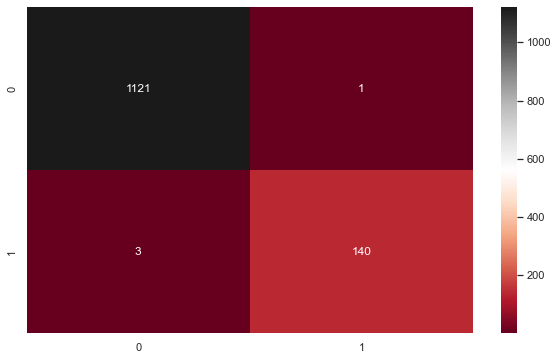

In [86]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdGy')

Explanation of confusion matrix: We had 1265 observations for the testing (y_test). 1122 bids predicteded correctly as normal (0), 4 were classified as anomalous (1) but actually they were normal bids (type II error). 139 bids correctly predicted to be anomalous, 0 bids were classified as normal but they were actually anomalous (type I error).

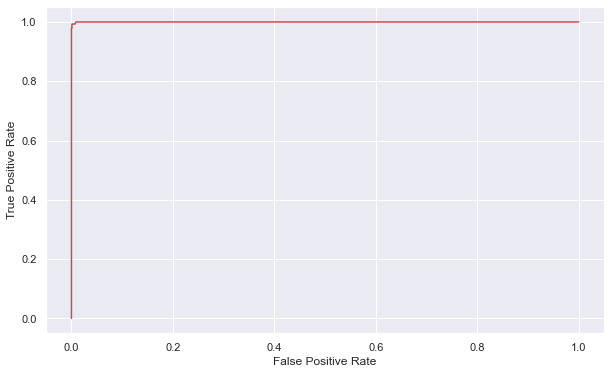

In [87]:
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color='r')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### E: Implementing Naive Bayes model

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.<br>
(Ray, S. (2017))

<b> Advantages of Naive Bayes </b>

1. When assumption of independent predictors holds true, a Naive Bayes classifier performs better as compared to other models.

2. Naive Bayes requires a small amount of training data to estimate the test data. So, the training period is less.

3. Naive Bayes is also easy to implement.

<b> Disadvantages of Naive Bayes </b>

1. Main imitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it is almost impossible that we get a set of predictors which are completely independent.

2. If categorical variable has a category in test data set, which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.<br>
(Kumar, N. (2019)


importing classifier from sklearn library

In [88]:
from sklearn.naive_bayes import GaussianNB

creating classifier

In [89]:
nb_model = GaussianNB()

fitting data into the classifier:

In [90]:
nb_model.fit(X_sm, y_sm)

GaussianNB()

In [91]:
nb_y_pred = nb_model.predict(X_test)


In [92]:
print('Training set score: {:.4f}'.format(nb_model.score(X_sm, y_sm)))
print('Test set score: {:.4f}'.format(nb_model.score(X_test, y_test)))

Training set score: 0.9814
Test set score: 0.9668


<b>  Naive Bayes model evaluation </b>

In [93]:
nb_model_accuracy = metrics.accuracy_score(y_test, nb_y_pred)
nb_model_precision = metrics.precision_score(y_test, nb_y_pred)
nb_model_recall = metrics.recall_score(y_test, nb_y_pred)
nb_model_f1 = metrics.f1_score(y_test, nb_y_pred)

print("Accuracy of Naive Bayes with default parameters - "   , nb_model_accuracy)
print("Precision of Naive Bayes with default parameters - ", nb_model_precision)
print("Sensitivity/recall of Naive Bayes with default parameters - ", nb_model_recall)
print('F1 score of Naive Bayes with default parameters - ', nb_model_f1)

Accuracy of Naive Bayes with default parameters -  0.966798418972332
Precision of Naive Bayes with default parameters -  0.772972972972973
Sensitivity/recall of Naive Bayes with default parameters -  1.0
F1 score of Naive Bayes with default parameters -  0.871951219512195


Confusion Matrix

In [94]:
print(classification_report(y_test, nb_y_pred))
print(metrics.confusion_matrix(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1122
           1       0.77      1.00      0.87       143

    accuracy                           0.97      1265
   macro avg       0.89      0.98      0.93      1265
weighted avg       0.97      0.97      0.97      1265

[[1080   42]
 [   0  143]]


<AxesSubplot:>

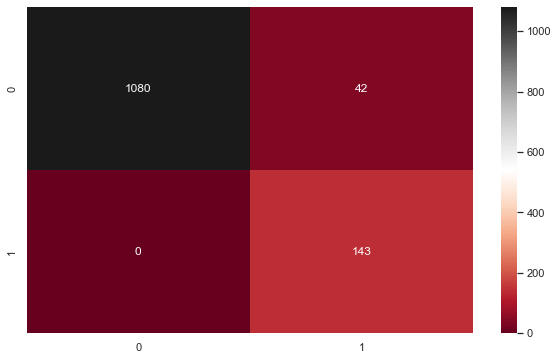

In [95]:
cm = confusion_matrix(y_test, nb_y_pred)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdGy')

Explanation of confusion matrix: We had 1265 observations for the testing (y_test). 1080 bids predicteded correctly as normal (0), 0 were classified as anomalous (1) but actually they were normal bids (type II error). 143 bids correctly predicted to be anomalous, 42 bids were classified as normal but they were actually anomalous (type I error).

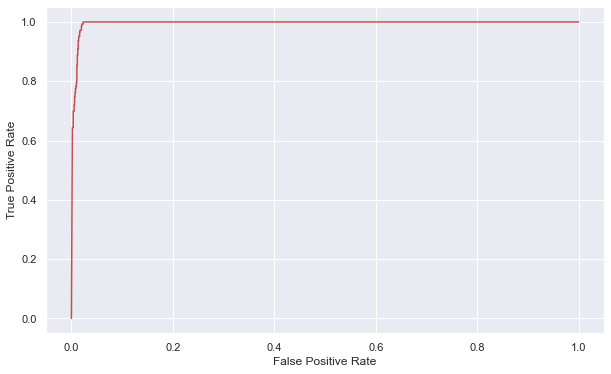

In [96]:
y_pred_proba = nb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, color='r')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### F: Model Comparison 

In [97]:
Model_Comparison = pd.DataFrame({
'Model' : ['SVM', 'Random Forest', 'Naive Bayes'],
'Accuracy Score' : [svc_model_accuracy, rf_model_accuracy, nb_model_accuracy],
'Precision' : [svc_model_precision, rf_model_precision, nb_model_precision],
'Recall': [svc_model_recall, rf_model_recall, nb_model_recall],
'F1 Score': [svc_model_f1, rf_model_f1, nb_model_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Random Forest,0.996838,0.992908,0.979021,0.985915
1,SVM,0.981028,0.860606,0.993007,0.922078
2,Naive Bayes,0.966798,0.772973,1.000000,0.871951


<AxesSubplot:ylabel='Model'>

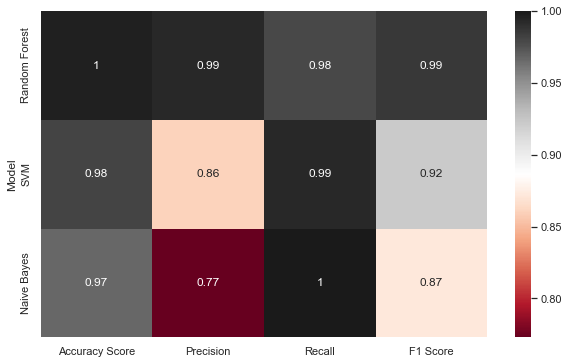

In [98]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(Model_Comparison_df, annot=True, cmap='RdGy')

After comparison of the models, evaluation of their results we can conclude that all three of them performed extremely well, where the best results were achieved by using Random Forest algorithm.

### Part 7: Findings and conclusion:

-	Our dataset was already very well pre-processed (no missing or duplicated values, cleaned and scaled).
It required minimum workload to prepare the dataset for our analysis.
-	The class distribution was highly unbalanced, and I have applied SMOTE up sampling to the X train dataset.
-	PCA as the dimensionality reduction tool proved to be not of use for this dataset, but it allowed us to visualize the separation of the classes pretty well.
-	Application of LDA proved that LDA is best of use for the multiclass problems, which our was not.
-	For the Machine learning purposes I have used our prepared data but with no dimensionality reduction.
One step could be considered here is to remove the features with the weakest correlation towards the Class, but I have not done that in this project as I could see that the results are very good without even trying to select best features.
-	For the prediction purposes the best model to use was RandomForest after hyper tunning.



### References:


- Saxena, S. (2020). Here’s All you Need to Know About Encoding Categorical Data (with Python code). Available: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/. Last accessed 10 Jan 2022.
- McGinnis, W. (2016). BaseN. Available: https://contrib.scikit-learn.org/category_encoders/basen.html. Last accessed 11 Jan 2022.
- VanderPlas, J (2016). Python Data Science Handbook. USA: O'Reilly Media, Inc.. In Depth: Principal Component Analysis.
unknown. (2008). Linear and Quadratic Discriminant Analysis¶. Available: https://scikit-learn.org/stable/modules/lda_qda.html. Last accessed 11 Jan 2022.
- Gudiksen, M.. (2021). Linear Discriminant Analysis (LDA), Maximum Class Separation!. Available: https://medium.com/mlearning-ai/linear-discriminant-analysis-lda-maximum-class-separation-1c3e2f66d846. Last accessed 12 Jan 2022.
- Brownlee, J. (2020). Supervised and Unsupervised Machine Learning Algorithms. Available: https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/. Last accessed 12 Jan 2022.
- Kumar, N. (2019). Advantages and Disadvantages of SVM (Support Vector Machine) in Machine Learning. Available: http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-svm.html. Last accessed 12 Jan 2022.
- Sreenivasa, S. (2020). Radial Basis Function (RBF) Kernel: The Go-To Kernel. Available: https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a. Last accessed 12 Jan 2022.
- Yiu, T. (2019). Understanding Random Forest. Available: https://towardsdatascience.com/understanding-random-forest-58381e0602d2. Last accessed 12 Jan 2022.
- Kumar, N. (2019). Advantages and Disadvantages of Random Forest Algorithm in Machine Learning. Available: http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-random.html. Last accessed 12 Jan 2022.
- Ray, S. (2017). 6 Easy Steps to Learn Naive Bayes Algorithm with codes in Python and R. Available: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/. Last accessed 12 Jan 2022.
- Kumar, N. (2019). Advantages and Disadvantages of Naive Bayes in Machine Learning. Available: http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-naive.html. Last accessed 12 Jan 2022.
- Alencar, R. (2018). Resampling strategies for imbalanced datasets. Available: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets. Last accessed 12 Jan 2022.
